<a href="https://colab.research.google.com/github/itspallavi20/Oral_Diseases_Prediction/blob/main/models/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Train'
val_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Validation'

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg19_base.layers:
    layer.trainable = False

model = Sequential([
    vgg19_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,448,710 (100.89 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',

)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=1
)


Found 1504 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.5332 - loss: 1.3609 - val_accuracy: 0.4410 - val_loss: 1.3984
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.1747
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - accuracy: 0.7683 - loss: 0.6906 - val_accuracy: 0.4688 - val_loss: 1.6402
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.8324
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.7899 - loss: 0.5967 - val_accuracy: 0.4792 - val_loss: 1.4702
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.6464
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.8552 - loss: 0.4601 - val_accuracy: 0.4965 - val_loss: 1.6162
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 2.2164
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.8772 - loss: 0.39

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Found 1504 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.8706 - loss: 0.3907 - val_accuracy: 0.4965 - val_loss: 1.7027 - learning_rate: 1.0000e-04
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 2.1655 - learning_rate: 1.0000e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.8834 - loss: 0.3366 - val_accuracy: 0.4792 - val_loss: 2.0056 - learning_rate: 1.0000e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.9240 - learning_rate: 1.0000e-04
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.9116 - loss: 0.2868 - val_accuracy: 0.5104 - val_loss: 1.8107 - learning_rate: 5.0000e-05
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.3267 - learning_rate: 5.0000e-05
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.9439 - loss: 0.2249 - val_accuracy: 0.5312 - val_loss: 1.6984 - learning_rate: 5.0000e-05
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("\nTraining and Validation Metrics per Epoch:")
print(f"{'Epoch':<6}{'Train Accuracy':<18}{'Validation Accuracy':<20}{'Train Loss':<15}{'Validation Loss':<15}")
for i in range(len(train_accuracy)):
    print(f"{i+1:<6}{train_accuracy[i]:<18.4f}{val_accuracy[i]:<20.4f}{train_loss[i]:<15.4f}{val_loss[i]:<15.4f}")


Training and Validation Metrics per Epoch:
Epoch Train Accuracy    Validation Accuracy Train Loss     Validation Loss
1     0.8657            0.4965              0.4016         1.7027         
2     0.0000            0.4167              0.0000         2.1655         
3     0.8923            0.4792              0.3214         2.0056         
4     0.0000            0.5833              0.0000         1.9240         
5     0.9229            0.5104              0.2607         1.8107         
6     0.0000            0.4167              0.0000         1.3267         
7     0.9362            0.5312              0.2319         1.6984         
8     0.0000            0.7500              0.0000         0.8861         
9     0.9382            0.5417              0.2102         1.7086         
10    0.0000            0.4167              0.0000         1.7588         


In [ ]:
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)

print(f"\nAverage Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")


Average Training Accuracy: 0.4555
Average Validation Accuracy: 0.5142


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step
Confusion Matrix:
[[ 3  1 12  5  2  0]
 [ 1  0 13  3  1  0]
 [ 1  2 31  8 11  4]
 [ 9 11 79 31 16  7]
 [ 1  2 13  8  5  1]
 [ 0  1 13  2  2  1]]

Class-wise TP, TN, FP, FN values:
Class Calculus:
  True Positives (TP): 3
  True Negatives (TN): 265
  False Positives (FP): 12
  False Negatives (FN): 20
Class Data Caries:
  True Positives (TP): 0
  True Negatives (TN): 265
  False Positives (FP): 17
  False Negatives (FN): 18
Class Gingivitis:
  True Positives (TP): 31
  True Negatives (TN): 113
  False Positives (FP): 130
  False Negatives (FN): 26
Class Hypodontia:
  True Positives (TP): 31
  True Negatives (TN): 121
  False Positives (FP): 26
  False Negatives (FN): 122
Class Mouth Ulcer:
  True Positives (TP): 5
  True Negatives (TN): 238
  False Positives (FP): 32
  False Negatives (FN): 25
Class Tooth Discoloration:
  True Positives (TP): 1
  True Negatives (TN): 269
  False Positives (FP): 12
  False Negatives (FN): 18


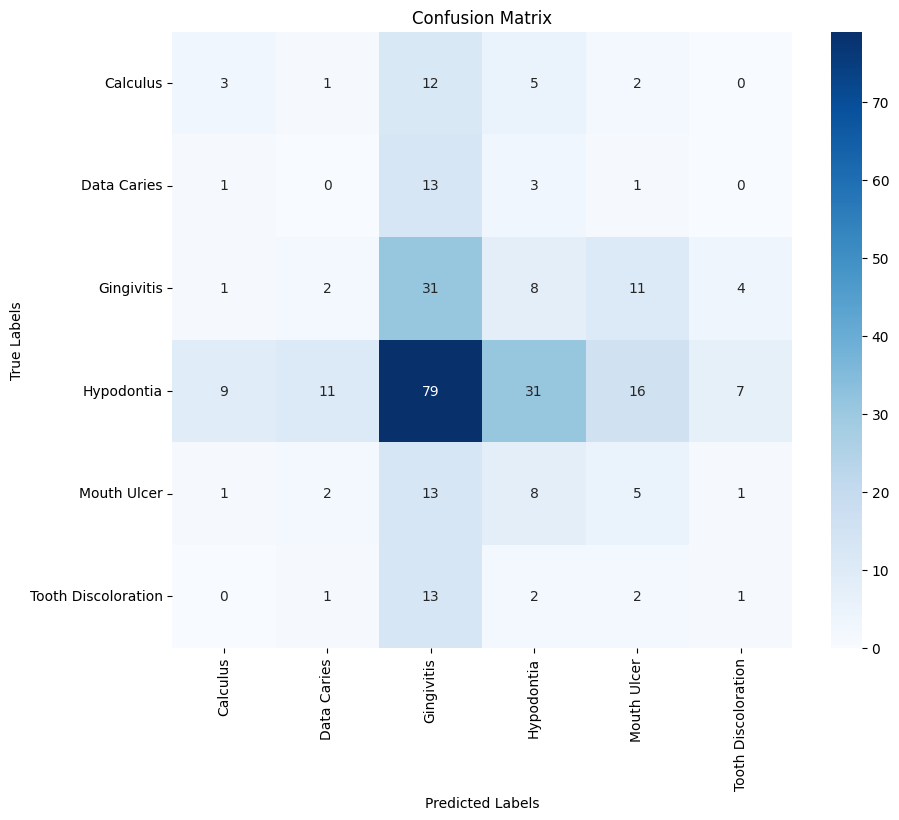


Classification Report:
                     precision    recall  f1-score   support

           Calculus       0.20      0.13      0.16        23
        Data Caries       0.00      0.00      0.00        18
         Gingivitis       0.19      0.54      0.28        57
         Hypodontia       0.54      0.20      0.30       153
        Mouth Ulcer       0.14      0.17      0.15        30
Tooth Discoloration       0.08      0.05      0.06        19

           accuracy                           0.24       300
          macro avg       0.19      0.18      0.16       300
       weighted avg       0.35      0.24      0.24       300



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the validation generator processes all samples
val_generator.reset()

# Generate predictions for the entire validation set
steps = val_generator.samples // val_generator.batch_size
if val_generator.samples % val_generator.batch_size != 0:
    steps += 1  # Account for incomplete last batch

predictions = model.predict(val_generator, steps=steps, verbose=1)

# Get predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes[:len(predicted_classes)]  # Ensure matching lengths
class_labels = list(val_generator.class_indices.keys())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate TP, TN, FP, FN for each class
print("\nClass-wise TP, TN, FP, FN values:")
for i, class_label in enumerate(class_labels):
    tp = conf_matrix[i, i]  # True Positives
    fn = np.sum(conf_matrix[i, :]) - tp  # False Negatives
    fp = np.sum(conf_matrix[:, i]) - tp  # False Positives
    tn = np.sum(conf_matrix) - (tp + fn + fp)  # True Negatives

    print(f"Class {class_label}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  True Negatives (TN): {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)
